# mRNA Expression Data Analysis for TCGA-BRCA

This notebook aims to explore and analyze mRNA expression data for breast cancer (BRCA) patients from The Cancer Genome Atlas (TCGA) project. The mRNA data, provided in TSV and JSON formats, contain quantification results for thousands of genes across multiple patient samples.

The main objectives of this notebook are:
- To parse and aggregate mRNA quantification data from raw TSV files.
- To link each quantification file to the corresponding patient using metadata from JSON files.
- To visualize the distribution of read counts, TPM, and FPKM values across samples.
- To provide summary statistics and insights into the mRNA expression profiles of the TCGA-BRCA cohort.

The analysis ensures that only valid quantification files are included and that all samples are consistently processed.

In [1]:
import pandas as pd
import os

RNA_PATH = "../../datasets/RNAseq"
RNA_JSON_PATH = "../../datasets/RNAseq(json&manifest)/files.2025-10-21.json"

In [2]:
# Check if all file in all sub folder od datasets/miRNA_seq terminate with mirnas.quantification.
subforder_count = 0
count_not_tsv = 0
count_tsv = 0
for subfolder in os.listdir(RNA_PATH):
    subforder_count += 1
    for file in os.listdir(f"{RNA_PATH}/{subfolder}"):
        if not file.endswith("augmented_star_gene_counts.tsv"):
            count_not_tsv+=1
            print(f"File {file} in folder {subfolder} does not end with augmented_star_gene_counts.tsv")
        else:
            count_tsv+=1
print(f"\nNumber of files not ending with mirnas.quantification.txt: {count_not_tsv}")
print(f"Count tsv file: {count_tsv}")
print(subforder_count)

File logs in folder 0022cd20-f64f-4773-b9ff-a3de0b71b259 does not end with augmented_star_gene_counts.tsv
File logs in folder 00469928-b243-4cae-acd7-134508e99ceb does not end with augmented_star_gene_counts.tsv
File logs in folder 0094f9d0-45ec-4aad-bca0-71c60bdd7113 does not end with augmented_star_gene_counts.tsv
File logs in folder 010e405c-b91d-4046-898e-105d5830d9a9 does not end with augmented_star_gene_counts.tsv
File logs in folder 017d71aa-0999-4d8e-9cb4-88b9013e61eb does not end with augmented_star_gene_counts.tsv
File logs in folder 02e08315-4d34-421c-acc0-129b1e1de38b does not end with augmented_star_gene_counts.tsv
File logs in folder 03891509-3109-450d-8564-77b024a6128e does not end with augmented_star_gene_counts.tsv
File logs in folder 03a1a105-4856-4e5c-b537-508bdbda50b5 does not end with augmented_star_gene_counts.tsv
File logs in folder 03d18286-1038-4c0c-9c05-d1269e280250 does not end with augmented_star_gene_counts.tsv
File logs in folder 04024f75-7405-4ccc-8976-91

We have **787** subfolders and all contain a file that ends with `augmented_star_gene_counts.tsv`.

## Analysis of a file TSV (tab-separated values)

In [3]:
df = pd.read_csv(f"{RNA_PATH}/0a74ea3f-dadc-4c9f-96ea-62a77c1e602c/4fa35f20-e26e-4bb0-811d-b307e3927904.rna_seq.augmented_star_gene_counts.tsv", sep="\t", comment="#")

print(df.head())

              gene_id gene_name       gene_type  unstranded  stranded_first  \
0          N_unmapped       NaN             NaN     1961927         1961927   
1      N_multimapping       NaN             NaN     4523899         4523899   
2         N_noFeature       NaN             NaN     1806860        28155361   
3         N_ambiguous       NaN             NaN     5809843         1435356   
4  ENSG00000000003.15    TSPAN6  protein_coding        6278            3164   

   stranded_second  tpm_unstranded  fpkm_unstranded  fpkm_uq_unstranded  
0          1961927             NaN              NaN                 NaN  
1          4523899             NaN              NaN                 NaN  
2         28076108             NaN              NaN                 NaN  
3          1439403             NaN              NaN                 NaN  
4             3115         90.3164          28.6817             32.0976  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60664 entries, 0 to 60663
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gene_id             60664 non-null  object 
 1   gene_name           60660 non-null  object 
 2   gene_type           60660 non-null  object 
 3   unstranded          60664 non-null  int64  
 4   stranded_first      60664 non-null  int64  
 5   stranded_second     60664 non-null  int64  
 6   tpm_unstranded      60660 non-null  float64
 7   fpkm_unstranded     60660 non-null  float64
 8   fpkm_uq_unstranded  60660 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.2+ MB


In [5]:
print(df.shape)

(60664, 9)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60664 entries, 0 to 60663
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gene_id             60664 non-null  object 
 1   gene_name           60660 non-null  object 
 2   gene_type           60660 non-null  object 
 3   unstranded          60664 non-null  int64  
 4   stranded_first      60664 non-null  int64  
 5   stranded_second     60664 non-null  int64  
 6   tpm_unstranded      60660 non-null  float64
 7   fpkm_unstranded     60660 non-null  float64
 8   fpkm_uq_unstranded  60660 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.2+ MB


The dataframe has **60499** rows and 9 columns: 
- **gene_id**: object
- **gene_name**: object
- **gene_type**: object
- **unstranded**: int64
- **stranded_first**: int64
- **stranded_second**: int64
- **tpm_unstranded**: float64
- **fpkm_unstranded**: float64
- **fpkm_uq_unstranded**: float64

In [7]:
print(df.describe())

         unstranded  stranded_first  stranded_second  tpm_unstranded  \
count  6.066400e+04    6.066400e+04     6.066400e+04    60660.000000   
mean   1.056196e+03    1.056196e+03     1.056196e+03       16.485328   
std    3.268194e+04    1.162638e+05     1.159473e+05      321.910603   
min    0.000000e+00    0.000000e+00     0.000000e+00        0.000000   
25%    0.000000e+00    0.000000e+00     0.000000e+00        0.000000   
50%    1.000000e+00    0.000000e+00     1.000000e+00        0.026100   
75%    4.600000e+01    5.300000e+01     5.300000e+01        1.442825   
max    5.809843e+06    2.815536e+07     2.807611e+07    35063.194000   

       fpkm_unstranded  fpkm_uq_unstranded  
count     60660.000000        60660.000000  
mean          5.235227            5.858729  
std         102.228782          114.403962  
min           0.000000            0.000000  
25%           0.000000            0.000000  
50%           0.008300            0.009300  
75%           0.458200            0.

In [8]:
print(df['gene_type'].value_counts())

gene_type
protein_coding                        19962
lncRNA                                16901
processed_pseudogene                  10167
unprocessed_pseudogene                 2614
misc_RNA                               2212
snRNA                                  1901
miRNA                                  1881
TEC                                    1057
snoRNA                                  943
transcribed_unprocessed_pseudogene      939
transcribed_processed_pseudogene        500
rRNA_pseudogene                         497
IG_V_pseudogene                         187
IG_V_gene                               145
transcribed_unitary_pseudogene          138
TR_V_gene                               106
unitary_pseudogene                       98
TR_J_gene                                79
scaRNA                                   49
polymorphic_pseudogene                   48
rRNA                                     47
IG_D_gene                                37
TR_V_pseudogene       

| Gene Type                         |  Count |
|-----------------------------------|-------:|
| protein_coding                    | 19 962 |
| lncRNA                            | 16 901 |
| processed_pseudogene              | 10 167 |
| unprocessed_pseudogene            |  2 614 |
| misc_RNA                          |  2 212 |
| snRNA                             |  1 901 |
| miRNA                             |  1 881 |
| TEC                               |  1 057 |
| snoRNA                            |    943 |
| transcribed_unprocessed_pseudogene |    939 |
| transcribed_processed_pseudogene  |    500 |
| rRNA_pseudogene                   |    497 |
| IG_V_pseudogene                   |    187 |
| ...                               |    ... |


### Check gene_id not start with EN

In [9]:
# See gene_id that not start with EN
not_en_df = df[~df['gene_id'].str.startswith('EN')]
print(not_en_df['gene_id'])

0        N_unmapped
1    N_multimapping
2       N_noFeature
3       N_ambiguous
Name: gene_id, dtype: object


The only gene_id that does not start with EN are:

| gene_id        |
|----------------|
| N_unmapped     |
| N_multimapping |
| N_noFeature    |
| N_ambiguous    |

### Plot gene_type distribution

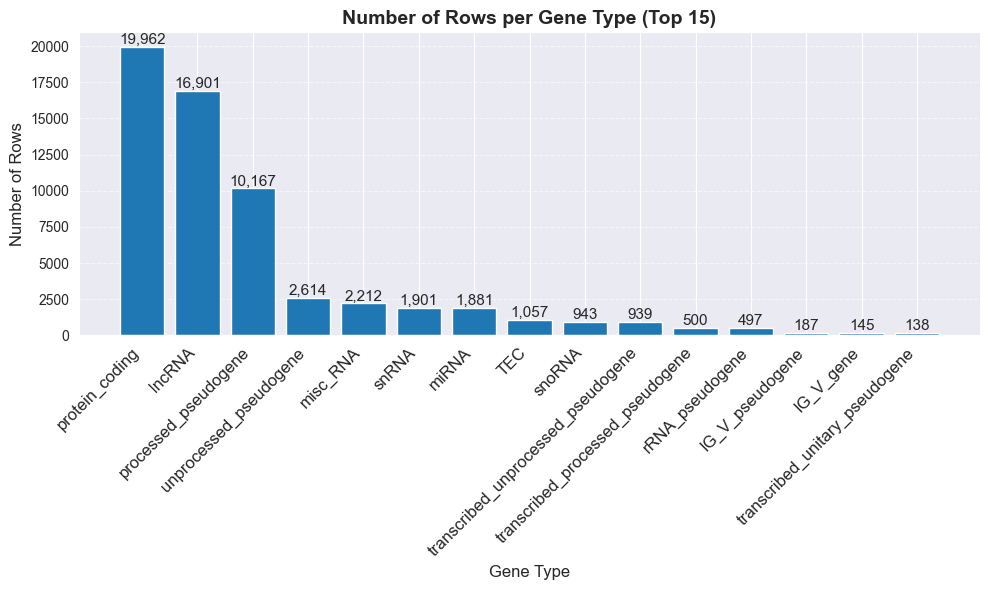

In [10]:
import matplotlib.pyplot as plt

# Count rows per gene_type
gene_type_counts = (
    df['gene_type']
    .value_counts()
    .sort_values(ascending=False)
    .head(15)
)

# Convert to DataFrame for plotting
gene_type_counts_df = (
    gene_type_counts
    .rename_axis('gene_type')
    .reset_index(name='row_count')
)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    gene_type_counts_df['gene_type'],
    gene_type_counts_df['row_count'],
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height):,}",  # formatted with commas
        ha='center', va='bottom',
        fontsize=11
    )

# Titles and labels
plt.title("Number of Rows per Gene Type (Top 15)", fontsize=14, fontweight='bold')
plt.xlabel("Gene Type", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)

# Improve X axis readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Load all cases

In [11]:
def import_txt(file_path):
    dtype_map = {
        "gene_id": "string",
        "gene_name": "string",
        "gene_type": "category",
        "unstranded": "Int64",
        "tpm_unstranded": "float64",
        "fpkm_unstranded": "float64"
    }
    usecols = ['gene_id', 'gene_name', 'gene_type', 'unstranded', 'tpm_unstranded', 'fpkm_unstranded']
    temp_df = pd.read_csv(file_path, sep="\t", comment="#", usecols=usecols, dtype=dtype_map)
    return temp_df.dropna(how="all")

def mRNA_process():
    all_dfs = []
    i = 0
    for subfolder in os.listdir(RNA_PATH):
        for file in os.listdir(f"{RNA_PATH}/{subfolder}"):
            if file.endswith("augmented_star_gene_counts.tsv"):
                print(f"{i} | Processing file: {RNA_PATH}/{subfolder}/{file}")
                i += 1
                selected_data = import_txt(f"{RNA_PATH}/{subfolder}/{file}")

                if selected_data is not None and not selected_data.empty:
                    selected_data.insert(0, "file_name", file)
                    all_dfs.append(selected_data)
    df = pd.concat(all_dfs, ignore_index=True)
    return df

mRNA_df = mRNA_process()
print(mRNA_df.shape)

0 | Processing file: ../../datasets/RNAseq/0022cd20-f64f-4773-b9ff-a3de0b71b259/8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.augmented_star_gene_counts.tsv
1 | Processing file: ../../datasets/RNAseq/00469928-b243-4cae-acd7-134508e99ceb/2f51534b-248b-4999-bc3f-e42a2e98332e.rna_seq.augmented_star_gene_counts.tsv
2 | Processing file: ../../datasets/RNAseq/0094f9d0-45ec-4aad-bca0-71c60bdd7113/cafc9e36-c5f0-45df-ad03-16210ff0d870.rna_seq.augmented_star_gene_counts.tsv
3 | Processing file: ../../datasets/RNAseq/010e405c-b91d-4046-898e-105d5830d9a9/7135f14b-e84f-4ebf-8d95-b2a3c843fd4d.rna_seq.augmented_star_gene_counts.tsv
4 | Processing file: ../../datasets/RNAseq/017d71aa-0999-4d8e-9cb4-88b9013e61eb/c6683fc6-49f4-4e53-94ac-251799c2c638.rna_seq.augmented_star_gene_counts.tsv
5 | Processing file: ../../datasets/RNAseq/02e08315-4d34-421c-acc0-129b1e1de38b/4a88d54f-c88c-4ffd-84c9-069b53f2cb28.rna_seq.augmented_star_gene_counts.tsv
6 | Processing file: ../../datasets/RNAseq/03891509-3109-450d-85

### Check for NaN values

In [12]:
print(mRNA_df.isna().sum())

file_name             0
gene_id               0
gene_name          3148
gene_type          3148
unstranded            0
tpm_unstranded     3148
fpkm_unstranded    3148
dtype: int64


We have NaN values in:

| Column               | NaN Count |
|---------------------|----------:|
| gene_name           |     3148 |
| gene_type           |     3148 |
| tpm_unstranded      |     3148 |
| fpkm_unstranded     |     3148 |


In [13]:
print(mRNA_df[mRNA_df['gene_type'].isna()])

                                                  file_name         gene_id  \
0         8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...      N_unmapped   
1         8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  N_multimapping   
2         8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...     N_noFeature   
3         8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...     N_ambiguous   
60664     2f51534b-248b-4999-bc3f-e42a2e98332e.rna_seq.a...      N_unmapped   
...                                                     ...             ...   
47621243  64b12ba7-a481-4fdb-9c74-38c94c7ef3c9.rna_seq.a...     N_ambiguous   
47681904  74179e5e-2d3c-417e-8844-6740ea9fb2e5.rna_seq.a...      N_unmapped   
47681905  74179e5e-2d3c-417e-8844-6740ea9fb2e5.rna_seq.a...  N_multimapping   
47681906  74179e5e-2d3c-417e-8844-6740ea9fb2e5.rna_seq.a...     N_noFeature   
47681907  74179e5e-2d3c-417e-8844-6740ea9fb2e5.rna_seq.a...     N_ambiguous   

         gene_name gene_type  unstranded  tpm_unstr

In [14]:
# Count how many gene_id are N_unmapped, N_multimapping, N_noFeature, N_ambiguous
print(mRNA_df['gene_id'].value_counts().loc[['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous']])

gene_id
N_unmapped        787
N_multimapping    787
N_noFeature       787
N_ambiguous       787
Name: count, dtype: Int64


787 * 4 = 3148, which matches the NaN counts above.

### Remove rows with gene_id in N_unmapped, N_multimapping, N_noFeature, N_ambiguous

In [15]:
mRNA_df = mRNA_df[~mRNA_df['gene_id'].isin(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'])]
print(mRNA_df.isna().sum())

file_name          0
gene_id            0
gene_name          0
gene_type          0
unstranded         0
tpm_unstranded     0
fpkm_unstranded    0
dtype: int64


Removing 'N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous' rows, we eliminate all **NaN values**.

In [16]:
# Show value counts of gene_type
print(mRNA_df['gene_type'].value_counts())

gene_type
protein_coding                        15710094
lncRNA                                13301087
processed_pseudogene                   8001429
unprocessed_pseudogene                 2057218
misc_RNA                               1740844
snRNA                                  1496087
miRNA                                  1480347
TEC                                     831859
snoRNA                                  742141
transcribed_unprocessed_pseudogene      738993
transcribed_processed_pseudogene        393500
rRNA_pseudogene                         391139
IG_V_pseudogene                         147169
IG_V_gene                               114115
transcribed_unitary_pseudogene          108606
TR_V_gene                                83422
unitary_pseudogene                       77126
TR_J_gene                                62173
scaRNA                                   38563
polymorphic_pseudogene                   37776
rRNA                                     36989
IG_

### Plot unstranded, tpm_unstranded, fpkm_unstranded distribution

In [17]:
print(mRNA_df.head(2))

                                           file_name             gene_id  \
4  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000003.15   
5  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...   ENSG00000000005.6   

  gene_name       gene_type  unstranded  tpm_unstranded  fpkm_unstranded  
4    TSPAN6  protein_coding        2443          28.535           8.0216  
5      TNMD  protein_coding         144           5.169           1.4531  


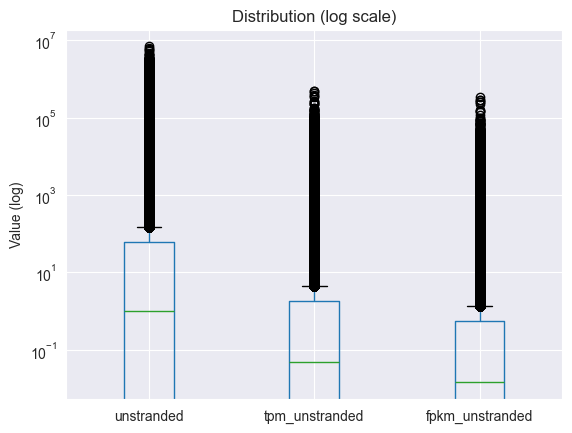

In [18]:
import matplotlib.pyplot as plt

mRNA_df[["unstranded", "tpm_unstranded", "fpkm_unstranded"]].boxplot()
plt.yscale('log')
plt.title("Distribution (log scale)")
plt.ylabel("Value (log)")
plt.show()

## Filter protein_coding genes

In [19]:
protein_coding_df = mRNA_df[mRNA_df['gene_type'] == 'protein_coding'].reset_index(drop=True)
print(protein_coding_df.shape)

(15710094, 7)


In [20]:
print(protein_coding_df.head())

                                           file_name             gene_id  \
0  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000003.15   
1  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...   ENSG00000000005.6   
2  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000419.13   
3  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000457.14   
4  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000460.17   

  gene_name       gene_type  unstranded  tpm_unstranded  fpkm_unstranded  
0    TSPAN6  protein_coding        2443         28.5350           8.0216  
1      TNMD  protein_coding         144          5.1690           1.4531  
2      DPM1  protein_coding        2322        101.9253          28.6527  
3     SCYL3  protein_coding        1466         11.2845           3.1723  
4  C1orf112  protein_coding         409          3.6297           1.0204  


### Distribution for protein_coding genes

In [23]:
print(protein_coding_df.describe())

        unstranded  tpm_unstranded  fpkm_unstranded
count   15710094.0    1.571009e+07     1.571009e+07
mean   2851.438817    4.495244e+01     1.353500e+01
std    14757.19516    4.666965e+02     1.601676e+02
min            0.0    0.000000e+00     0.000000e+00
25%           13.0    2.353000e-01     7.110000e-02
50%          532.0    6.266700e+00     1.912800e+00
75%         2391.0    2.702660e+01     8.047100e+00
max      7032374.0    2.739599e+05     9.657695e+04


| Statistica | unstranded | tpm_unstranded | fpkm_unstranded |
|:------------|------------:|---------------:|----------------:|
| mean | 2,851.44 | 44.95 | 13.54 |
| std  | 14,757.20 | 466.70 | 160.17 |
| min  | 0.00 | 0.00 | 0.00 |
| 25%  | 13.00 | 0.24 | 0.07 |
| 50%  | 532.00 | 6.27 | 1.91 |
| 75%  | 2,391.00 | 27.03 | 8.05 |
| max  | 7,032,374.00 | 273,959.89 | 96,576.95 |


In [ ]:
import matplotlib.pyplot as plt

protein_coding_df[["unstranded", "tpm_unstranded", "fpkm_unstranded"]].boxplot()
plt.yscale('log')
plt.title("Protein Coding Genes Distribution (log scale)")
plt.ylabel("Value (log)")
plt.show()

### Aggregating mRNA data by file_name

In [22]:
aggr_mRNA_df = mRNA_df.groupby( ['file_name']).agg({
    'gene_id': list,
    'gene_name': list,
    'gene_type': list,
    'unstranded': list,
    'tpm_unstranded': list,
    'fpkm_unstranded': list
}).reset_index()

print(aggr_mRNA_df.shape)

(787, 7)


In [24]:
aggr_mRNA_df['list_length'] = aggr_mRNA_df['fpkm_unstranded'].apply(len)
print(aggr_mRNA_df['list_length'].to_list())

[60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660, 60660

In [26]:
print(aggr_mRNA_df.head(1))

                                           file_name  \
0  00a26384-1b1c-4db4-9664-75fb9b3febdb.rna_seq.a...   

                                             gene_id  \
0  [ENSG00000000003.15, ENSG00000000005.6, ENSG00...   

                                           gene_name  \
0  [TSPAN6, TNMD, DPM1, SCYL3, C1orf112, FGR, CFH...   

                                           gene_type  \
0  [protein_coding, protein_coding, protein_codin...   

                                          unstranded  \
0  [3888, 9, 1458, 2135, 440, 486, 1251, 1380, 14...   

                                      tpm_unstranded  \
0  [76.5053, 0.5442, 107.8173, 27.6859, 6.5783, 1...   

                                     fpkm_unstranded  list_length  
0  [19.6654, 0.1399, 27.7141, 7.1166, 1.6909, 3.2...        60660  


In [27]:
aggr_mRNA_df.drop(columns=['list_length'], inplace=True)

# mRNA JSON

In [28]:
df_RNA_json = pd.read_json(RNA_JSON_PATH)
print(df_RNA_json.columns)

Index(['data_format', 'cases', 'access', 'file_name', 'file_id', 'data_type',
       'data_category', 'experimental_strategy', 'platform', 'file_size',
       'annotations'],
      dtype='object')


In [29]:
print(df_RNA_json.shape)

(787, 11)


In [31]:
print(df_RNA_json[['cases', 'file_name']].shape)
print(df_RNA_json[['cases', 'file_name']].head(1))

(787, 2)
                                               cases  \
0  [{'case_id': '878f975b-94fd-4d69-b7e7-1ed3ac2e...   

                                           file_name  
0  94027f46-390c-4dda-ab89-cb1ac0a291cd.rna_seq.a...  


In [32]:
cases_expanded = df_RNA_json['cases'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {})
unique_projects = pd.json_normalize(cases_expanded)['project.project_id'].unique()

print("Unique project IDs:", unique_projects)

Unique project IDs: ['TCGA-BRCA']


In [33]:
df_RNA_json['case_id'] = df_RNA_json['cases'].apply(
    lambda x: x[0]['case_id'] if isinstance(x, list) and len(x) > 0 and 'case_id' in x[0] else None
)

print(df_RNA_json[['case_id', 'file_name']].head())

                                case_id  \
0  878f975b-94fd-4d69-b7e7-1ed3ac2ee438   
1  e4fc0909-f284-4471-866d-d8967b6adcbc   
2  e5aae05a-478e-4a55-a27c-12b2b4be302a   
3  d0b78f3f-a198-437a-ab8c-204345d3b75d   
4  566792ae-f853-4a47-856d-f02cdcfcb18a   

                                           file_name  
0  94027f46-390c-4dda-ab89-cb1ac0a291cd.rna_seq.a...  
1  df45fb41-4511-4dab-b865-fcdfcda0400a.rna_seq.a...  
2  c33ecc28-d5ba-4416-b93d-445b7883b6e8.rna_seq.a...  
3  f8ff90c6-3554-4e19-ae56-18f30f51f9b5.rna_seq.a...  
4  4c6cb929-293d-452e-b7f8-d535b48cf073.rna_seq.a...  


# Merge mRNA with mRNA JSON on file_name

In [34]:
miRNA_merged_df = pd.merge(protein_coding_df, df_RNA_json[['case_id', 'file_name']], on='file_name', how='inner')
print(miRNA_merged_df.head())

                                           file_name             gene_id  \
0  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000003.15   
1  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...   ENSG00000000005.6   
2  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000419.13   
3  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000457.14   
4  8d1641ea-7552-4d23-9298-094e0056386a.rna_seq.a...  ENSG00000000460.17   

  gene_name       gene_type  unstranded  tpm_unstranded  fpkm_unstranded  \
0    TSPAN6  protein_coding        2443         28.5350           8.0216   
1      TNMD  protein_coding         144          5.1690           1.4531   
2      DPM1  protein_coding        2322        101.9253          28.6527   
3     SCYL3  protein_coding        1466         11.2845           3.1723   
4  C1orf112  protein_coding         409          3.6297           1.0204   

                                case_id  
0  c2a742fe-3e8b-4210-85a6-7191a1123609  
1 